<h1> Reproducing Kernel Hilbert Spaces: An example from Support vector Machines<\h1>

In this excercise we look at the application of **Reproducing kernel Hilbert spaces** to support vector machines. I am assuming the familiarity with Kasso's notes posted on the course page and discussed in the first lecture of course 4. So lets begin!

The first thing we do is make ourselves familiar with the application of SVMs to nonlinearly separable data. For that we need some nonlinearly separable data. So here goes.

\usepackage{bbm}

<h2> SVM with coordinate transformations <\h2>

In [46]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import svm

N = 200                           # 200 points per class 
X = np.zeros(shape=(N*2, 3))      # dummy dataset 
Y = np.repeat([0, 1], repeats=N)  # true class labels 

Now lets arrange these points along *concnetric gaussian circles*. That means we have them randomly fluctuate in position about their respective mean radii. The second thing is for them to be spread around the entire circumfrence so we need an angular distribution too. 

In [47]:
radius0 = np.random.normal(loc=1, scale=0.15, size=N)    # radius & angle for inner points 
theta0 = np.linspace(start=0, stop=360, num=N)
radius1 = np.random.normal(loc=2, scale=0.25, size=N)    # radius & angle for outer points 
theta1 = np.linspace(start=0, stop=360, num=N)
radius, theta = np.concatenate([radius0, radius1]), np.concatenate([theta0, theta1])


Now we are ready to define the coordinates with the classes 

In [48]:
X[:, 0] = radius * np.cos(theta)   # x1-coordinate 
X[:, 1] = radius * np.sin(theta)   # x2-coordinate 

Lets make sure they look all ready to go

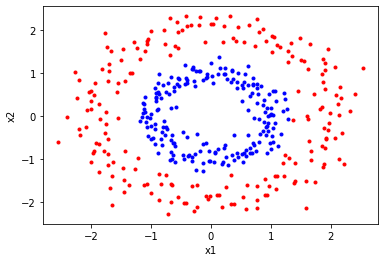

In [49]:
plt.plot(X[Y==0, 0], X[Y==0, 1], 'bo', markersize=3)
plt.plot(X[Y==1, 0], X[Y==1, 1], 'ro', markersize=3)
plt.xlabel('x1'); plt.ylabel('x2')
plt.show()

**See what I mean**

Now we dont mean to discourage ourselves but this looks like a tough cookie to apply SVM to as there doesn't seem to be a separating hyperplane visible at the first look. We could be wrong but we are not.

So what should we do? Well what about applying a transformation to the dataset where we increase its dimensions to give us more leverage on the coordinates so that there is a possibility of a **class separating hyperplane**.


For that we consider $$h:\mathbb{R}^{2}\longrightarrow \mathbb{R}^{3}$$ i.e. a mapping that transforms this 2-dimensional dataset into a 3-dimensional one. Now what could such an $h$ be. One choice is 
$$h(x_1,x_2)=\begin{bmatrix} x_1 & x_2 & {x_1}^2+{x_2}^2 \end{bmatrix}$$
So the dataset becomes $$H(\mathcal{X})=\begin{bmatrix} x^{(1)} \\ x^{(2)} \\ x^{(3)}\\ \cdots \\ x^{(n)} \end{bmatrix}$$
where $(i)$ denotes the $i^{th}$ set of coordinates. Now lets try the SVM again.

In [50]:
X[:, 2] = np.square(X[:, 0]) + np.square(X[:, 1])    # create x3-coordinate 
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)        # fit SVM and store model weights 
coef, intercept = clf.coef_[0], clf.intercept_

The equation of plane in three dimensions is $$\frac{-ax-by-c}{d}=z$$. Where do we thing $a,b,c$ and $d$ would come from? For the hint lets look at the SVM plotting below.

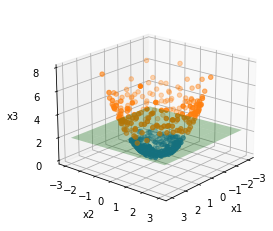

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[Y==0, 0], X[Y==0, 1], X[Y==0, 2], 'b')
ax.scatter(X[Y==1, 0], X[Y==1, 1], X[Y==1, 2], 'r')
xx, yy = np.meshgrid(range(-3, 4), range(-3, 4))
z = (-coef[0]*xx - coef[1]*yy - intercept)/coef[2]
ax.plot_surface(xx, yy, z, color='green', alpha=0.3)
ax.view_init(20, 40)
ax.set_xlabel('x1'); ax.set_ylabel('x2'); ax.set_zlabel('x3')
plt.show()

The plane can be seen separating the data linearly which wasnt possible in the original format but adding the extra coordinate helped. To delve a little deeper into this SVM, the optimization problem is 
$$  \max_{  \alpha_1,\alpha_2,\cdots \alpha_n  }f(\alpha_1,\alpha_2,\cdots \alpha_n )=\sum_{i=1}^{n}\alpha_i-\frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}y^{(i)}y^{(j)}\alpha_i\alpha_j\langle x^{(i)},x^{(j)}\rangle_{\mathcal{X}}$$

subject to

$$\alpha_i\geq 0\forall i \in \{1,2,3\cdots n\}$$ and $$\sum_{i=1}^{n}\alpha_iy^{(i)}=0$$

In our transformation, we have replaced the dot product $\langle x^{(i)},x^{(j)}\rangle_{\mathcal{X}}$ by $\langle h(x^{(i)}),h(x^{(j)})\rangle_{\mathcal{X}}$ and given our data a structure for the SVM to train on $h(x^{(i)})$ rather than $x^{(i)}$. In short, **We transformed our raw attributes into higher-dimensional features, and made the data more linearly-separable, and therefore improved the performance of the support vector machine.** Now comes the question for the next level issue. **What if there is a dataset on which the above trick doesnt work?**

<h2>Reproducing Kernel Hilbert Space </h2>

Lets generate some data which is even less separable than the one before. Here goes our spiral galaxy.

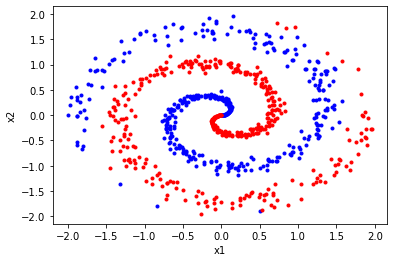

In [55]:
N = 400                            # 200 points per class 
X = np.zeros(shape=(N*2, 2))       # dummy dataset 
Y = np.repeat([0, 1], repeats=N)   # true class labels 

radius0 = np.linspace(0, 2, N)     # radius and angle for blue spiral 
theta0 = np.linspace(0, 3*math.pi, N) + np.linspace(0, 0.7, N)*np.random.randn(N)
radius1 = np.linspace(0, 2, N)     # radius and angle for red spiral 
theta1 = np.linspace(math.pi, 4*math.pi, N) + np.linspace(0, 0.7, N)*np.random.randn(N)
radius, theta = np.concatenate([radius0, radius1]), np.concatenate([theta0, theta1])

X[:, 0] = radius * np.cos(theta)   # x1-coordinate 
X[:, 1] = radius * np.sin(theta)   # x2-coordinate 

plt.figure(figsize=(6,4))
plt.plot(X[Y==0, 0], X[Y==0, 1], 'bo', markersize=3)
plt.plot(X[Y==1, 0], X[Y==1, 1], 'ro', markersize=3)
plt.xlabel('x1'); plt.ylabel('x2')
plt.show()

**Where is this code different from the one above so that it produces the spirals instead of the concnetric random normals?**

Of course there doesnt seem to be an $h$ that would transform these coordinates into something separable. *But what if there was a function to give the data a radial basis?*. Turns out the good old Gaussian
$$ K(x,z)=\exp{-\left(\frac{\|x-z\|^2}{2\sigma^{2}}\right)}$$
does the trick. Now lets see how it is done. We replace the inner product $\langle x^{(i)},x^{(j)}\rangle_{\mathcal{X}}$ by the gaussian kernel $K(x,z)$. If you look again at Kassos notes in the RKHS section, you would see that $K(x,z)$ is positive semi-definte and is therefore a valid **RKHS**. To show this we code for our SVM.

0.935


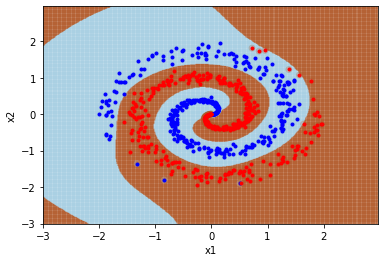

In [56]:
clf2 = svm.SVC(kernel='rbf', gamma=1.0, C=5.0)
clf2.fit(X, Y)
print(clf2.score(X, Y))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 0].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
xnew = np.c_[xx.ravel(), yy.ravel()]
ynew = clf2.predict(xnew).reshape(xx.shape)

plt.figure(figsize=(6,4))
plt.plot(X[Y==0, 0], X[Y==0, 1], 'bo', markersize=3)
plt.plot(X[Y==1, 0], X[Y==1, 1], 'ro', markersize=3)
plt.xlabel('x1'); plt.ylabel('x2')
CM = plt.cm.get_cmap('Paired')
CM._init()
CM._lut	[:,-1] = 0.2
plt.set_cmap(CM)
plt.pcolormesh(xx, yy, ynew,shading='auto')
plt.scatter(X[:,0], X[:,1], c=Y)

plt.show()

**With just $400$ data points, there is $93.5\%$ accuracy in producing the highly nonlinear decision boundary akin to our separating surface in the coordinate transofrmation case.**